# PLEASE NOTE
This notebook is run in google colab, the file paths will not be the same for you as it is based on my set up in my google drive. The data can be downloaded from the data folder inside my repo, uploaded to your google drive. If you are running this on your own, I strongly suggest running this in colab, as the later models take around 10 minutes per Epoch (with 25 epochs) WITH colab's GPU. 

In [1]:
# allows me to use photos from my custom dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#changes file path so less imbedded 
!unzip -uq /content/drive/MyDrive/cocktail_classifier/Data.zip

In [20]:
###########
# imports #
###########

import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing, layers
from keras.preprocessing.image import image_dataset_from_directory, ImageDataGenerator, image
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout, AveragePooling2D, experimental

#photo displaying imports
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg





Populating the interactive namespace from numpy and matplotlib


In [4]:
#generators allow augmentation of photos for each epoch
# this helps my low data source

#names of the classes I created
class_list = [
 'Aperol Spritz',
 'Bloody Mary',
 'Cosmo',
 'Irish Coffee',
 'Margarita',
 'Mimosa',
 'Mojito',
 'Moscow Mule',
 'Old Fashioned',
 'Pina Colada']

#Generator for training set. Allows for augmentation
train_generator = keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 2,
    width_shift_range = 2,
    height_shift_range = 2,
    zoom_range = .3,
    horizontal_flip = True,
    vertical_flip = False,
    data_format = 'channels_last',
    validation_split = .2
)
# Generator for validation set, the remaining 20% from above split
val_generator = keras.preprocessing.image.ImageDataGenerator(
    data_format = 'channels_last',
    validation_split = .2
)

# test generator, will not have a split or augmentation.
test_generator = keras.preprocessing.image.ImageDataGenerator(
    data_format = 'channels_last'
)


# This is the actual data generated for training, uses the augmentation
# signified in the train generator. This tells the generator where to pull
# photos from, and how to format them
flow_traindf = train_generator.flow_from_directory(
    '/content/Data/Train Data',
    target_size = (256, 256),
    color_mode = 'rgb',
    classes = class_list,
    class_mode = 'categorical',
    batch_size = 16,
    seed = 7,
    subset = 'training'
)

# This is
flow_valdf = val_generator.flow_from_directory(
    directory = '/content/Data/Train Data',
    target_size = (256, 256),
    color_mode = 'rgb',
    classes = class_list,
    class_mode = 'categorical',
    batch_size = 16,
    seed = 7,
    subset = 'validation'
)




# And finally the test generator that the model will be evaluated on. 
flow_testdf = test_generator.flow_from_directory(
    directory = '/content/Data/Test Data',
    target_size = (256, 256),
    color_mode = 'rgb',
    classes = ['Aperol Test', 'Bloody Test', 'Cosmo Test', 'Irish Test', 'Margarita Test',
               'Mimosa Test', 'Mojito Test', 'Mule Test', 'Fashioned Test', 'Pina Test'],
    class_mode = 'categorical',
    batch_size = 1,
    shuffle = False,
)


Found 2918 images belonging to 10 classes.
Found 725 images belonging to 10 classes.
Found 449 images belonging to 10 classes.


In [5]:
'''
Final model I chose after testing various different models.
The colab_testing notebook inside the prelim_code folder has previous models
that include different amounts of layers, filter sizes, and even a model that tried
transfer learning with mobilenets' imange_net, this was this custom framework works the best so far
'''



model = Sequential()

# Setting image size, and color channel
model.add(InputLayer(input_shape = (256, 256, 3)))

#Convolutional layers
model.add(Conv2D(
            filters=10,
            kernel_size=3, 
            activation='relu', 
            padding='same'))


model.add(Conv2D(
            filters=20,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model.add(AveragePooling2D())

model.add(Conv2D(
            filters=40,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model.add(AveragePooling2D())

model.add(Conv2D(
            filters=60,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model.add(AveragePooling2D())

model.add(Conv2D(
            filters=100,
            kernel_size=3, 
            activation='relu', 
            padding='same'))

model.add(AveragePooling2D())

#flatten image for Dense layers
model.add(GlobalAveragePooling2D())


# Dense layers
model.add(Dense(100, activation = 'relu'))

model.add(Dense(80, activation = 'relu'))

model.add(Dense(40, activation='relu'))

model.add(Dense(20, activation = 'relu'))

model.add(Dropout(.20))

model.add(Dense(10, activation='softmax'))  

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)


history = model.fit(flow_traindf, epochs=25, verbose=1, validation_data=flow_valdf,
           steps_per_epoch = 800, validation_steps = 300,
       callbacks=[
           keras.callbacks.ModelCheckpoint(
               'models/mnist.{epoch:02d}-{val_loss:.2f}.hdf5',
               save_best_only=True)
       ])  # track progress as we fit

Epoch 1/25
800/800 [==============================] - 208s 226ms/step - loss: 2.2444 - accuracy: 0.1568 - val_loss: 2.0540 - val_accuracy: 0.2364
Epoch 2/25
800/800 [==============================] - 178s 222ms/step - loss: 2.0587 - accuracy: 0.2251 - val_loss: 1.9224 - val_accuracy: 0.2810
Epoch 3/25
800/800 [==============================] - 179s 225ms/step - loss: 1.9417 - accuracy: 0.2565 - val_loss: 1.7977 - val_accuracy: 0.3052
Epoch 4/25
800/800 [==============================] - 177s 222ms/step - loss: 1.8250 - accuracy: 0.3117 - val_loss: 1.6403 - val_accuracy: 0.3784
Epoch 5/25
800/800 [==============================] - 180s 225ms/step - loss: 1.7170 - accuracy: 0.3467 - val_loss: 1.5224 - val_accuracy: 0.4742
Epoch 6/25
800/800 [==============================] - 179s 224ms/step - loss: 1.5704 - accuracy: 0.4265 - val_loss: 1.2781 - val_accuracy: 0.5801
Epoch 7/25
800/800 [==============================] - 179s 224ms/step - loss: 1.3831 - accuracy: 0.5158 - val_loss: 1.0582 -

In [6]:
model.save('/content/drive/MyDrive/cocktail_classifier/my_model.h5')

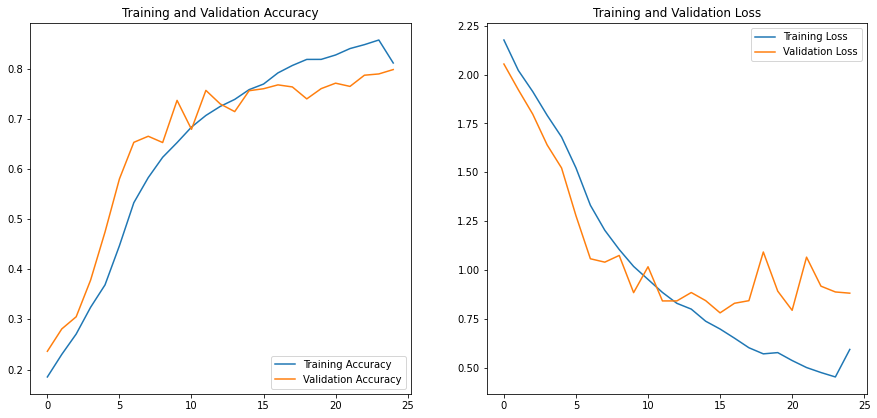

In [7]:
# checking the learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Using the same steps from above epochs for fairness. 
model.evaluate(flow_testdf, steps = 800)

800/800 [==============================] - 3s 4ms/step - loss: 0.9379 - accuracy: 0.7337


[0.9379237294197083, 0.7337499856948853]

So this verson of the model scored better on train and validation, a little bit lower on test set accuracy. I will need to correct for overfitting in the future, but I still have an app to build

# At this point
I downloaded the file into my project folder, so I can utilize the recipies and other work I did without uploading into my google drive.

In [8]:
# re-loading the model since this was just opened for the first time in jupyter
# also have to re-run the input cell
# using the newly created model, despite having both, for continuity
model = tf.keras.models.load_model('app/my_model.h5')
df = pd.read_csv('./data/recipie_df.csv') # dataframe of recipies and ingredients

In [16]:
# re-creating the variable after download
label_names = [
 'Aperol Spritz',
 'Bloody Mary',
 'Cosmo',
 'Irish Coffee',
 'Margarita',
 'Mimosa',
 'Mojito',
 'Moscow Mule',
 'Old Fashioned',
 'Pina Colada']


def photo_tester(path):
    '''
    expands upon the pre-processing function, to pull all the infromation for the photo at once
    '''
    #pre-process
    img = image.load_img(path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    #display
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
    
    #argsort take the predictions, and lists them in an array. calling [0] just takes the list of predictions
    #the highest probable drink is last, so forward reverses the order.
    backwards = model.predict(x).argsort()[0]
    forwards = []
    for items in backwards[-1::-1]:
        forwards.append(label_names[items])
        
    print('We believe it looks like like this!')
    print(forwards[0])
    
    ingredients = df.loc[df.cocktail == forwards[0]]['ingredients'].tolist()[0]
    print('The ingredients for this cocktail are:' + ingredients)
    
    recipie = df.loc[df.cocktail == forwards[0]]['recipie'].tolist()[0]
    print('And you make it like this!' + recipie)
    
    
    print('And if that\'s not it, it may be one of these:' + forwards[1] + forwards[2] )

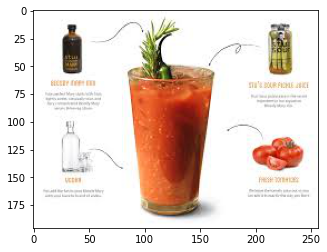

We believe it looks like like this!
Bloody Mary
The ingredients for this cocktail are:['Vodka', 'Tomato juice', 'Lemon juice', 'Worcestershire sauce', 'Tabasco sauce', 'Lime']
And you make it like this!Stirring gently, pour all ingredients into highball glass. Garnish.
And if that's not it, it may be one of these:Aperol SpritzOld Fashioned


In [22]:
photo_tester('data/manual_test/bloody_test.jpeg')

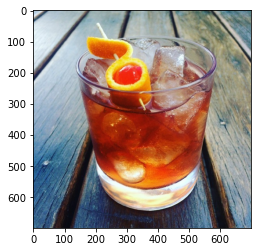

We believe it looks like like this!
Bloody Mary
The ingredients for this cocktail are:['Vodka', 'Tomato juice', 'Lemon juice', 'Worcestershire sauce', 'Tabasco sauce', 'Lime']
And you make it like this!Stirring gently, pour all ingredients into highball glass. Garnish.
And if that's not it, it may be one of these:Old FashionedAperol Spritz


In [23]:
photo_tester('data/manual_test/old_test.jpg')